## Removing Artifacts

#### Import Libraries

In [3]:
from skimage.io import imread
import matplotlib.pyplot as plt
import scipy.fftpack as fp
import numpy as np

from PIL import Image
Image.MAX_IMAGE_PIXELS = None  # Override PIL's DecompressionBombError

#### Select Image

In [2]:
img_loc = 'test/denoised_19648311_RH.png'

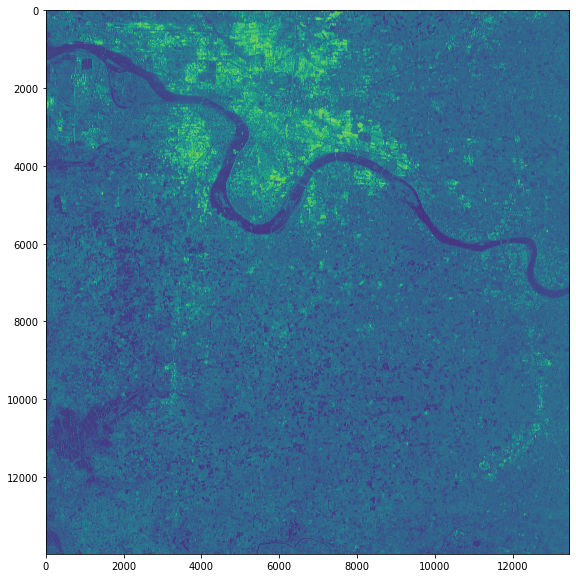

In [3]:
# im = np.mean(imread(img_loc), axis=2) # assuming an RGB image

img = imread(img_loc)

im = np.mean(img)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

<ipython-input-4-04d305534f4a>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)


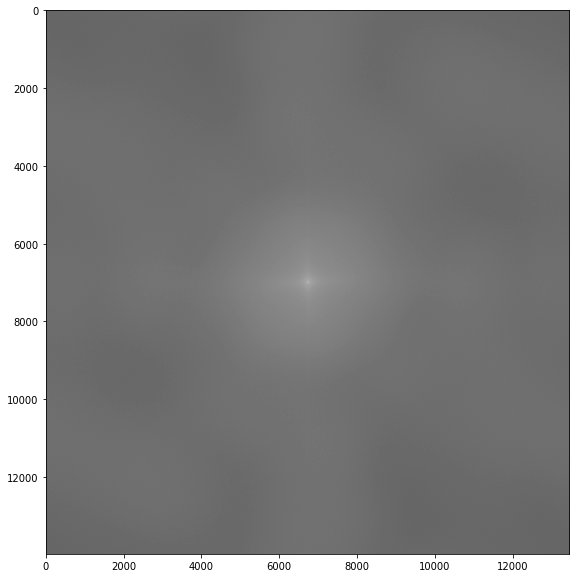

In [4]:
F1 = fp.fft2((img).astype(float))
F2 = fp.fftshift(F1)
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.show()

### Free Memory

In [ ]:
## Freeup Memory
import pickle

pickle.dump(F2, open('F2_dump.pickle', 'wb'))

## Restore Data

In [2]:
import pickle

F2 = pickle.load(open('F2_dump.pickle', 'rb'))

In [3]:
img_loc = 'test/denoised_19648311_RH.png'
img = imread(img_loc)

In [4]:
F1 = 0
(w, h) = img.shape
img = 0

<ipython-input-5-9e2755afdcb9>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + F2)).astype(int))


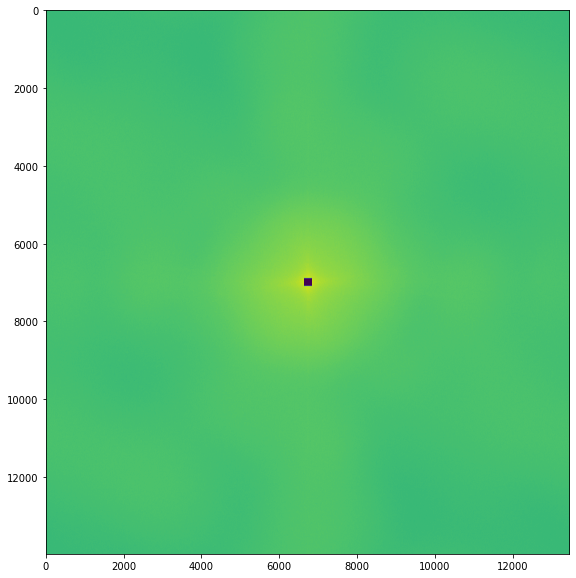

In [5]:
# (w, h) = img.shape
half_w, half_h = int(w/2), int(h/2)

# high pass filter
n = 100
F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int))
plt.show()

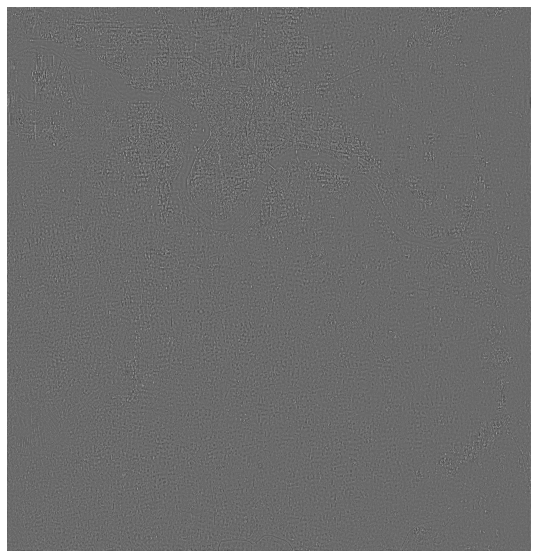

In [6]:
im1 = fp.ifft2(fp.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
im = Image.fromarray(im1).convert('P')
im.save("denoised_19648311_RH_mask.png")

## Mask Thresholding

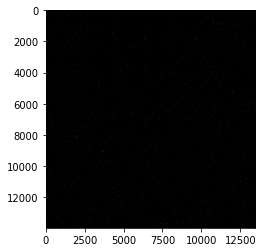

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread("denoised_19648311_RH_mask.png",0)

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

plt.imshow(thresh1,'gray')
plt.show()


In [4]:
im = Image.fromarray(thresh1).convert('P')
im.save("denoised_19648311_RH_mask_th.png")

## Image Inpainting

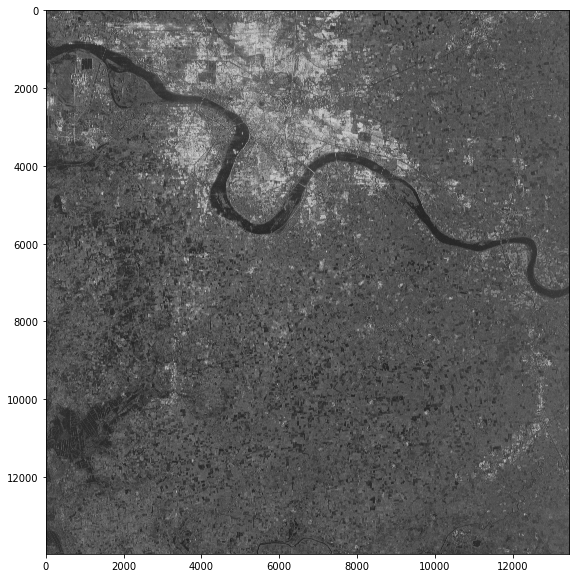

In [5]:
import numpy as np
import cv2 as cv

img = cv.imread('test/denoised_19648311_RH.png')
mask = cv.imread("denoised_19648311_RH_mask_th.png",0)

dst = cv.inpaint(img,mask,3,cv.INPAINT_TELEA)

plt.figure(figsize=(10,10))
plt.imshow(dst)
plt.show()

In [10]:
dst_img = Image.fromarray(dst).convert('L')
dst_img.save("denoised_19648311_RH_final.jpg")